# Lidl Analytics – Data Science Case Study

In [26]:
#Importing and installing all necessary libaries

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#Seaborn for Statistical Data Visualization
import seaborn as sns

# import Sklearn set up and models
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import tree


print('Libraries imported.')

Libraries imported.


**Import the data**

In [2]:
candy = pd.read_csv('candy-data.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


**Check basic criteria**

In [3]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [4]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


**Plot the most succesful bars**

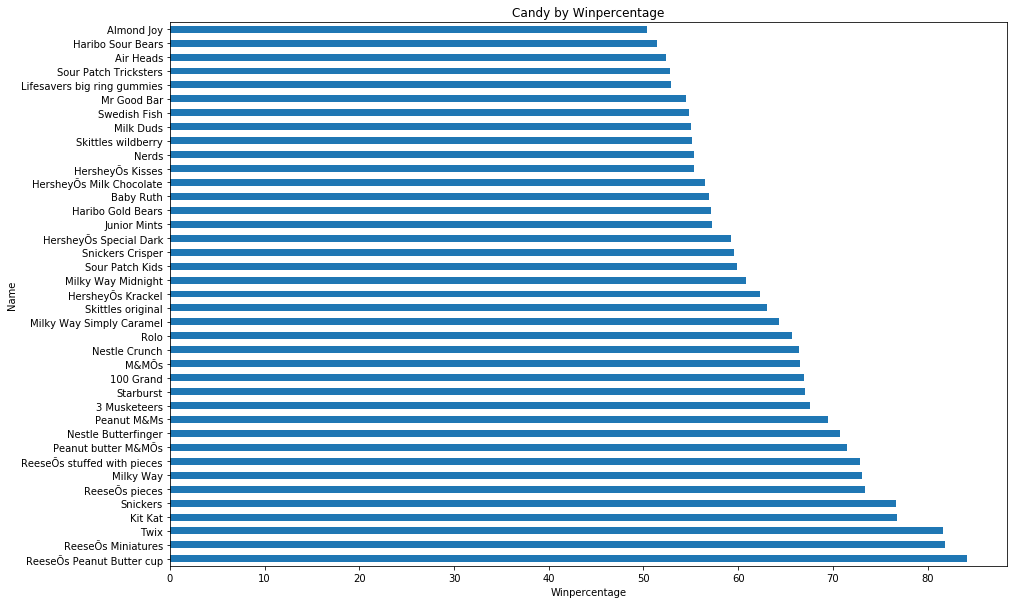

In [5]:
#Plot the population by district

candy_sorted = candy.sort_values('winpercent',ascending=False)
candy_sorted = candy_sorted[candy_sorted.winpercent > 50]

candy_sorted[['competitorname', 'winpercent']].plot(kind='barh', figsize=(15, 10), legend = None)
plt.xlabel('Winpercentage') # add to x-label to the plot
plt.ylabel('Name') # add y-label to the plot
plt.title('Candy by Winpercentage') # add title to the plot
plt.yticks (np.arange(39), candy_sorted['competitorname'])
plt.show()

In [6]:
candy_sorted.head(15)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


As can be seen from the initial data, the most succesfull candies seem to have the characteristic chocolate, peanutyalmondy and bar.

**Explore what features are most strongly related to winpercantage**

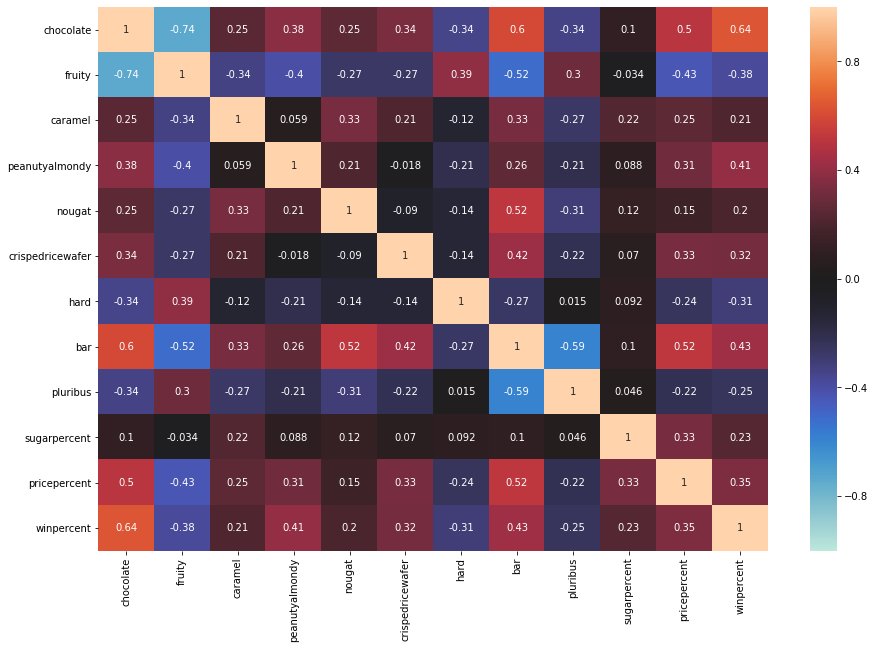

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(candy.corr(),annot = True, vmin=-1, vmax=1, center= 0)

The strongest positive relations with winpercent are: chocolate (0.64), bar (0.43) and peanutyalmondy (0.41).

**Univariate Analysis (Boxplots)**
(Observations of only a single characteristic)

Text(0.5, 1.0, 'chocolate to winpercent')

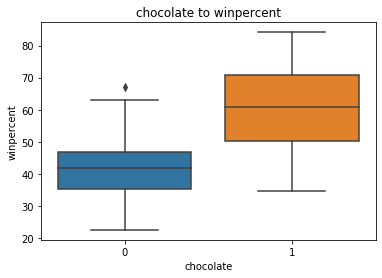

In [8]:
sns.boxplot(x="chocolate", y="winpercent", data=candy).set_title('chocolate to winpercent')

From the plot, we can deduce that a candy that contains chocolate has a median winpercent of over 60.

Text(0.5, 1.0, 'bar to winpercent')

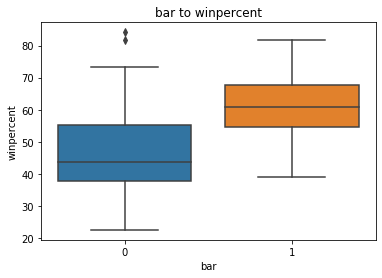

In [9]:
sns.boxplot(x="bar", y="winpercent", data=candy).set_title('bar to winpercent')

While a bar type candy has a median winrate of over 60, there are several outliers. This means that there are several very succesfull candies, which are not bars.

Text(0.5, 1.0, 'peanutyalmondy to winpercent')

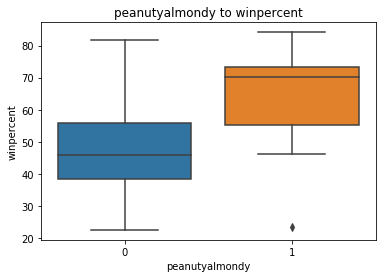

In [10]:
sns.boxplot(x="peanutyalmondy", y="winpercent", data=candy).set_title('peanutyalmondy to winpercent')

Candy containing peanuts, peanut butter or almonds have a very high median winrate of over 70.

Text(0.5, 1.0, 'crispedricewafer to winpercent')

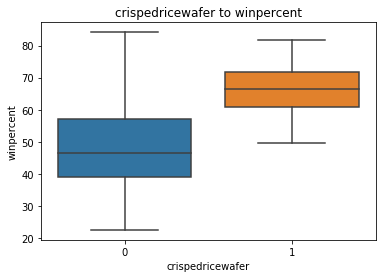

In [11]:
sns.boxplot(x="crispedricewafer", y="winpercent", data=candy).set_title('crispedricewafer to winpercent')

Text(0.5, 1.0, 'hard to winpercent')

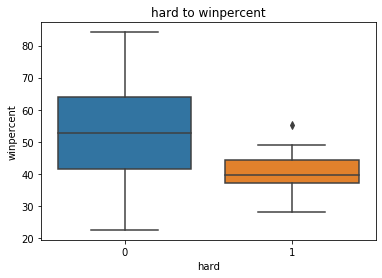

In [12]:
sns.boxplot(x="hard", y="winpercent", data=candy).set_title('hard to winpercent')

Hard candy have a lower than average winpercentage and are in fact slightly negatively correlated with win percantage.

Text(0.5, 1.0, 'fruity to winpercent')

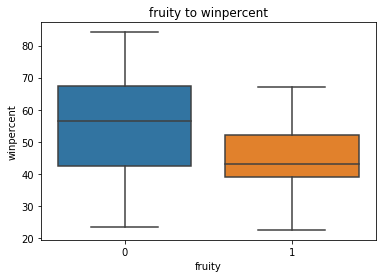

In [13]:
sns.boxplot(x="fruity", y="winpercent", data=candy).set_title('fruity to winpercent')

Fruity candy also seem to be negatively correlated to succesfull candy.

From the basic correlation matrix and the univariate analysis we can deduce, that the "perfect candy" consists of a bar made with chocolate, peanuts, peanut butter or almonds. It is not fruity and not a hard bar. 
In order to test this hypothesis we select all bars with the mentioned features and calculate the average win percentage.

In [16]:
candy_best = candy[candy.chocolate == 1]
candy_best = candy_best[candy_best.bar == 1]
candy_best = candy_best[candy_best.peanutyalmondy == 1]
candy_best.head(10)
candy_best.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,6.0,6.0,6.000000,6.0,6.000000,6.000000,6.0,6.0,6.0,6.000000,6.00000,6.000000
mean,1.0,0.0,0.500000,1.0,0.333333,0.166667,0.0,1.0,0.0,0.522667,0.75350,61.454536
std,0.0,0.0,0.547723,0.0,0.516398,0.408248,0.0,0.0,0.0,0.116340,0.09861,10.133570
min,1.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.0,0.313000,0.65100,50.347546
25%,1.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.0,0.485250,0.68000,55.123475
50%,1.0,0.0,0.500000,1.0,0.000000,0.000000,0.0,1.0,0.0,0.575000,0.76700,58.221899
75%,1.0,0.0,1.000000,1.0,0.750000,0.000000,0.0,1.0,0.0,0.604000,0.76700,67.934044
max,1.0,0.0,1.000000,1.0,1.000000,1.000000,0.0,1.0,0.0,0.604000,0.91800,76.673782


The average win percentage is 61.45 compared to 50.32 of the full data set.

**Feature Importance**

Apart from the correlation it is also imporant to gauge the impact of the features on the target variable.

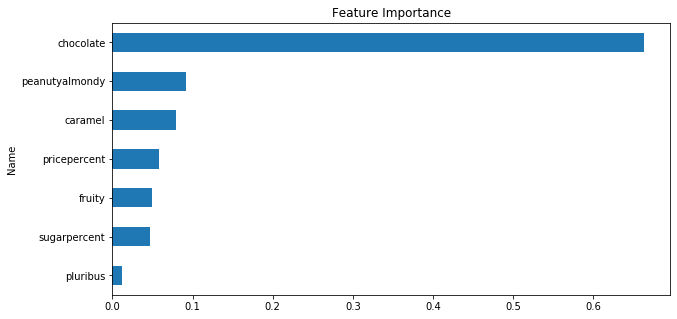

In [17]:
reg = tree.DecisionTreeRegressor(max_depth=3).fit(candy[candy.columns[1:-1]],candy[candy.columns[-1]])

imp = pd.DataFrame.from_dict({'Name':candy.columns[1:-1],'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)
imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',title='Feature Importance',sort_columns=True,figsize = (10,5),legend=False)

**Model Selection and Training**

As we want to predict a single variable, while utilizing a set of independent variables a regression seems to be best suited to predict an optimal product. Since we have multiple predictor variables a "Multiple Linear Regression" or a "Polynominal Regression" seem to be the most intuitive fit.

Split the data into a training and a test set, in order to apply machine learning algorithms.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(candy[candy.columns[1:-1]],candy[candy.columns[-1]], test_size=0.3, random_state=42)
rmse_err = []

Multiple Linear Regression:

In [46]:
lr_reg = LinearRegression().fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,lr_reg.predict(X_test))))
rmse_err[-1]

11.743427446509092

In [47]:
print ('Coefficients: ', lr_reg.coef_)
print ('Intercept: ',lr_reg.intercept_)

Coefficients:  [18.91643961  9.53388314  1.72930865  7.42512994  1.17885246  4.63892896
 -7.2207561   0.16555892 -5.21701158 11.3883678  -4.3693074 ]
Intercept:  36.34545115713087


Interpreting the results shows that chocolate adds about 18.9 points to win percentage, fruit adds about 9.5, peanutalmondy adds about 7.4 and the price percentile adds about 11.4.

Polynominal Regression:

In [58]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

lg = LinearRegression().fit(X_, y_train)

rmse_err.append(math.sqrt(mean_squared_error(y_test,lg.predict(X_test_))))
rmse_err[-1]

47.133433036998674

By trial and error, we can see that a degree of 2 has the highest root-mean-square-error, without significant overfitting.

In [38]:
print ('Coefficients: ', lg.coef_)
print ('Intercept: ',lg.intercept_)

Coefficients:  [ 2.08827400e-12  3.99022910e+01  1.12428736e+01  1.20965311e+01
 -5.27399125e+01  1.67517168e+01  1.50635512e+00  2.91410340e+00
  4.89967811e+00  8.62756291e+00 -8.37110477e+01  5.73394268e+01
  3.99022910e+01  4.19468417e+01  1.90556606e+02  6.31811036e+01
  4.43573093e+00  1.50635512e+00  4.19468417e+01 -7.41630772e+00
 -2.00149610e+01 -2.55305591e+02  1.19328974e+01  1.12428736e+01
  1.80833126e-12  2.70716782e-12 -5.16919840e-13  5.89750471e-13
 -1.01616607e+01  1.36246570e-12 -1.42886167e+01  2.13657984e+01
 -2.24237069e+01  1.20965311e+01 -3.19239404e+01 -8.26891133e+01
 -4.38508657e+01  1.00638820e+01 -9.24405595e+01 -8.17973351e+00
 -1.23441045e+01 -4.51632623e+01 -5.27399125e+01 -1.27407949e+01
 -6.86715968e+00  0.00000000e+00 -7.00469908e+01  1.40743290e+01
  2.22533401e+02  1.38802299e+01  1.67517168e+01  0.00000000e+00
  0.00000000e+00  1.67517168e+01  0.00000000e+00  3.02684819e+01
 -3.86379882e+01  1.50635512e+00  0.00000000e+00 -5.85481317e+01
  6.005448

In [70]:
from sklearn.metrics import r2_score

x_test_poly = poly.fit_transform(X_test)
y_test_ = lg.predict(x_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test_ , y_test) )

Mean absolute error: 27.44
Residual sum of squares (MSE): 2221.56
R2-score: -0.09
